<a href="https://colab.research.google.com/github/Cristian-Rojas2/TalentoTech/blob/main/Cristian_Rojas_Copy_of_Laboratorio1_TalentoTech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio # 1

### Temas: Limpieza de Datos, análisis de negocio, integración de fuentes de datos

# 1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

#2. El set de datos

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco.csv`) con 45215 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual de ingresos en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

#3. Una primera mirada al dataset

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Lectura
from google.colab import drive
drive.mount('/content/drive')

ruta = "/content/drive/MyDrive/ESCRIBE LA RUTA DE TU ARCHIVO CSV"
data = pd.read_csv(ruta)

In [2]:
ruta = "/content/dataset_banco.csv"
data = pd.read_csv(ruta)
data

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no   2143.0     yes   no   
1       44    technician    single  secondary      no     29.0     yes   no   
2       33  entrepreneur   married  secondary      no      2.0     yes  yes   
3       47   blue-collar   married    unknown      no   1506.0     yes   no   
4       33       unknown    single    unknown      no      1.0      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45210   51    technician   married   tertiary      no    825.0      no   no   
45211   71       retired  divorced    primary      no   1729.0      no   no   
45212   72       retired   married  secondary      no   5715.0      no   no   
45213   57   blue-collar   married  secondary      no    668.0      no   no   
45214   37  entrepreneur   married  secondary      no   2971.0      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may     261.0         1   -1.0         0  unknown   no  
1        unknown    5   may     151.0         1   -1.0         0  unknown   no  
2        unknown    5   may      76.0         1   -1.0         0  unknown   no  
3        unknown    5   may      92.0         1   -1.0         0  unknown   no  
4        unknown    5   may     198.0         1   -1.0         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45210   cellular   17   nov     977.0         3   -1.0         0  unknown  yes  
45211   cellular   17   nov     456.0         2   -1.0         0  unknown  yes  
45212   cellular   17   nov    1127.0         5  184.0         3  success  yes  
45213  telephone   17   nov     508.0         4   -1.0         0  unknown   no  
45214   cellular   17   nov     361.0         2  188.0        11    other   no  

[45215 rows x 17 columns]

In [ ]:
#proporciona visualización y exploración de datos con el dataset cargado

# **Visualización y Exploración de Datos:**


*   df.head(): Muestra las primeras filas del DataFrame.
*   df.tail(): Muestra las últimas filas del DataFrame.
*   df.info(): Muestra información sobre el DataFrame, incluyendo tipos de datos y valores no nulos.
*   df.describe(): Proporciona estadísticas descriptivas para columnas numéricas.
*   df.shape: Devuelve una tupla con la cantidad de filas y columnas del DataFrame.
*   df.columns: Devuelve una lista con los nombres de las columnas del DataFrame.

## Transformación de nombres de atributos

In [ ]:
#cambia los nombres de las columnas del dataframe
# Renombramos las columnas
data_rename_2 = data.rename(columns={
                                  'age':        'edad',
                                  'job':        'trabajo',
                                  'marital':    'estado_civil',
                                  'education':  'educacion',
                                  'default':    'morosidad',
                                  'balance':    'saldo',
                                  'housing':    'vivienda',
                                  'loan':       'prestamo',
                                  'contact':    'contacto',
                                  'day':        'dia',
                                  'month':      'mes',
                                  'duration':   'duracion',
                                  'campaign':   'campana',
                                  'pdays':      'dias_previos',
                                  'previous':   'anterior',
                                  'poutcome':   'resultado',
                                  'y':          'respuesta'})

# Verificamos los cambios
print(data_rename_2.head())

   edad       trabajo estado_civil  educacion morosidad   saldo vivienda  \
0    58    management      married   tertiary        no  2143.0      yes   
1    44    technician       single  secondary        no    29.0      yes   
2    33  entrepreneur      married  secondary        no     2.0      yes   
3    47   blue-collar      married    unknown        no  1506.0      yes   
4    33       unknown       single    unknown        no     1.0       no   

  prestamo contacto  dia  mes  duracion  campana  dias_previos  anterior  \
0       no  unknown    5  may     261.0        1          -1.0         0   
1       no  unknown    5  may     151.0        1          -1.0         0   
2      yes  unknown    5  may      76.0        1          -1.0         0   
3       no  unknown    5  may      92.0        1          -1.0         0   
4       no  unknown    5  may     198.0        1          -1.0         0   

  resultado respuesta  
0   unknown        no  
1   unknown        no  
2   unknown   

In [ ]:
# Renombrar las columnas #2
data.columns = ['edad',
              'trabajo',
              'estado_civil',
              'educacion',
              'incumplimiento',
              'saldo',
              'vivienda',
              'prestamo',
              'contacto',
              'dia',
              'mes',
              'duracion',
              'campaña',
              'dias_previos',
              'anterior',
              'resultado_prev',
              'respuesta']

print(data.columns)

Index(['edad', 'trabajo', 'estado_civil', 'educacion', 'incumplimiento',
       'saldo', 'vivienda', 'prestamo', 'contacto', 'dia', 'mes', 'duracion',
       'campaña', 'dias_previos', 'anterior', 'resultado_prev', 'respuesta'],
      dtype='object')


In [ ]:
#visualiza las primeras líneas de tu .csv

print(data.head(10))
data.tail()

   edad       trabajo estado_civil  educacion incumplimiento   saldo vivienda  \
0    58    management      married   tertiary             no  2143.0      yes   
1    44    technician       single  secondary             no    29.0      yes   
2    33  entrepreneur      married  secondary             no     2.0      yes   
3    47   blue-collar      married    unknown             no  1506.0      yes   
4    33       unknown       single    unknown             no     1.0       no   
5    35    management      married   tertiary             no   231.0      yes   
6    28    Management       single   tertiary             no   447.0      yes   
7    42  entrepreneur         div.   tertiary            yes     2.0      yes   
8    58       retired      married    primary             no   121.0      yes   
9    43    technician       single  secondary             no   593.0      yes   

  prestamo contacto  dia  mes  duracion  campaña  dias_previos  anterior  \
0       no  unknown    5  may   

edad       trabajo estado_civil  educacion incumplimiento   saldo  \
45210    51    technician      married   tertiary             no   825.0   
45211    71       retired     divorced    primary             no  1729.0   
45212    72       retired      married  secondary             no  5715.0   
45213    57   blue-collar      married  secondary             no   668.0   
45214    37  entrepreneur      married  secondary             no  2971.0   

      vivienda prestamo   contacto  dia  mes  duracion  campaña  dias_previos  \
45210       no       no   cellular   17  nov     977.0        3          -1.0   
45211       no       no   cellular   17  nov     456.0        2          -1.0   
45212       no       no   cellular   17  nov    1127.0        5         184.0   
45213       no       no  telephone   17  nov     508.0        4          -1.0   
45214       no       no   cellular   17  nov     361.0        2         188.0   

       anterior resultado_prev respuesta  
45210         0        unknown       yes  
45211         0        unknown       yes  
45212         3        success       yes  
45213         0        unknown        no  
45214        11          other        no

In [ ]:
#visualiza las variables categóricas y las numéricas

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   edad            45215 non-null  int64  
 1   trabajo         45213 non-null  object 
 2   estado_civil    45214 non-null  object 
 3   educacion       45214 non-null  object 
 4   incumplimiento  45215 non-null  object 
 5   saldo           45213 non-null  float64
 6   vivienda        45215 non-null  object 
 7   prestamo        45215 non-null  object 
 8   contacto        45215 non-null  object 
 9   dia             45215 non-null  int64  
 10  mes             45215 non-null  object 
 11  duracion        45214 non-null  float64
 12  campaña         45215 non-null  int64  
 13  dias_previos    45214 non-null  float64
 14  anterior        45215 non-null  int64  
 15  resultado_prev  45215 non-null  object 
 16  respuesta       45215 non-null  object 
dtypes: float64(3), int64(4), object

In [ ]:
#clasificar columnas
categoricas = data_rename_2.select_dtypes(include=['object']).columns.tolist()
numericas = data_rename_2.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Columnas categóricas:", categoricas)
print("Columnas numéricas:", numericas)

Columnas categóricas: ['trabajo', 'estado_civil', 'educacion', 'morosidad', 'vivienda', 'prestamo', 'contacto', 'mes', 'resultado', 'respuesta']
Columnas numéricas: ['edad', 'saldo', 'dia', 'duracion', 'campana', 'dias_previos', 'anterior']


In [ ]:
pd.value_counts(data_rename_2['trabajo'])

<ipython-input-10-f48f120ed624>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data_rename_2['trabajo'])


trabajo
blue-collar       9731
management        9455
technician        7599
admin.            5168
services          4153
retired           2263
self-employed     1578
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
unknown            288
administrative       3
Management           2
MANAGEMENT           2
Self-employed        1
Services             1
Retired              1
Name: count, dtype: int64

In [ ]:
#proporciona estadísticas descriptivas para columnas numéricas
data.describe()

edad          saldo           dia      duracion       campaña  \
count  45215.000000   45213.000000  45215.000000  45214.000000  45215.000000   
mean      41.004711    1374.159866     15.805839    258.074357      2.763729   
std       12.036647    3924.255525      8.322473    257.605175      3.097910   
min       18.000000   -8019.000000      1.000000  -1389.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max      776.000000  527532.000000     31.000000   4918.000000     63.000000   

       dias_previos      anterior  
count  45214.000000  45215.000000  
mean      40.192485      0.580383  
std      100.120622      2.303438  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

Al ver este primer analisis de estadisticas descriptivas a las correspondientes columnas podemos notar que la base de datos deberia de tener un estudio de limpieza de datos ya que se evidencian datos outliers como lo puede ser la edad donde se evidencia un dato con una edad de 776 años. Esto podria ser util para analizar correlaciones entre variables, como la relacion entre el saldo y la duracion de la campaña o la efectividad de los contactos.


> Add blockquote



## 4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

## 4.1 Datos faltantes

Acá comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "job", "marital", "education", "balance", "duration" y "pdays".

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:

In [ ]:
#Comando para contar los valores faltantes de mi dataframe
data_rename_2.isna().sum()

edad            0
trabajo         2
estado_civil    1
educacion       1
morosidad       0
saldo           2
vivienda        0
prestamo        0
contacto        0
dia             0
mes             0
duracion        1
campana         0
dias_previos    1
anterior        0
resultado       0
respuesta       0
dtype: int64

In [ ]:
#elimino los valores faltantes de mi dataframe
data.dropna(inplace=True)

#conteo de valores por columna de mi dataframe
data.count()

edad              45207
trabajo           45207
estado_civil      45207
educacion         45207
incumplimiento    45207
saldo             45207
vivienda          45207
prestamo          45207
contacto          45207
dia               45207
mes               45207
duracion          45207
campaña           45207
dias_previos      45207
anterior          45207
resultado_prev    45207
respuesta         45207
dtype: int64

##4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los valores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

# **for col in cols_cat:**
Este es un bucle for que itera sobre cada elemento en la lista cols_cat. La variable col tomará el valor de cada elemento en cada iteración del bucle.

print(f'Columna {col}: {data[col].nunique()} subniveles'): Dentro del bucle, esta línea de código imprime un mensaje que indica el nombre de la columna (col), seguido por el número de subniveles únicos en esa columna.

f'Columna {col}: {data[col].nunique()} subniveles': Esta es una cadena de formato (f-string) que contiene dos variables:
{col}: Representa el nombre de la columna actual en la iteración del bucle.
{data[col].nunique()}: Representa el número de subniveles únicos en la columna actual. data[col] selecciona la columna actual del DataFrame y .nunique() calcula el número de valores únicos en esa columna.

In [ ]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['trabajo', 'estado_civil', 'educacion', 'incumplimiento', 'vivienda',
       'prestamo', 'contacto', 'mes', 'resultado_prev',]

for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna trabajo: 18 subniveles
Columna estado_civil: 6 subniveles
Columna educacion: 10 subniveles
Columna incumplimiento: 2 subniveles
Columna vivienda: 2 subniveles
Columna prestamo: 6 subniveles
Columna contacto: 5 subniveles
Columna mes: 12 subniveles
Columna resultado_prev: 6 subniveles


In [ ]:
#Cantidad de registros por subniveles para cada variable
for col in cols_cat:
  print(f"\nConteo de registros por subniveles para la variable '{col}':")
  print(data[col].value_counts())


Conteo de registros por subniveles para la variable 'trabajo':
trabajo
blue-collar       9727
management        9456
technician        7593
administrative    5168
services          4152
retired           2263
self-employed     1578
entrepreneur      1487
unemployed        1303
housemaid         1240
student            937
unknown            288
Name: count, dtype: int64

Conteo de registros por subniveles para la variable 'estado_civil':
estado_civil
married     27203
single      12785
divorced     5204
Name: count, dtype: int64

Conteo de registros por subniveles para la variable 'educacion':
educacion
secondary    23189
tertiary     13298
primary       6848
unknown       1857
Name: count, dtype: int64

Conteo de registros por subniveles para la variable 'incumplimiento':
incumplimiento
no     44377
yes      815
Name: count, dtype: int64

Conteo de registros por subniveles para la variable 'vivienda':
vivienda
yes    25113
no     20079
Name: count, dtype: int64

Conteo de registros p

In [ ]:
#Conteo los valores
pd.value_counts(data['trabajo'])

<ipython-input-15-4a60e626e6a2>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['trabajo'])


trabajo
blue-collar       9730
management        9454
technician        7597
admin.            5166
services          4153
retired           2263
self-employed     1578
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
unknown            288
administrative       3
Management           2
MANAGEMENT           2
Self-employed        1
Services             1
Retired              1
Name: count, dtype: int64

Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

La **desviación estándar** es una medida que nos indica qué tan dispersos o alejados están los valores de un conjunto de datos respecto a su media o promedio. En otras palabras, nos ayuda a entender cuánto varían los valores individuales de un conjunto de datos con respecto a su valor promedio.

Imagina que tienes un conjunto de datos que representa las alturas de estudiantes en una clase. Si la desviación estándar es baja, significa que la mayoría de los estudiantes tienen alturas muy similares entre sí y cercanas a la altura promedio de la clase. Por otro lado, si la desviación estándar es alta, significa que las alturas de los estudiantes están muy dispersas, algunos son muy altos y otros muy bajos en comparación con la altura promedio.

Entonces, la desviación estándar nos da una idea de la dispersión o variabilidad de los datos alrededor de su promedio. Una desviación estándar baja indica que los datos están más agrupados alrededor del promedio, mientras que una desviación estándar alta indica que los datos están más dispersos o separados del promedio.

In [ ]:
print(data.columns)

Index(['edad', 'trabajo', 'estado_civil', 'educacion', 'incumplimiento',
       'saldo', 'vivienda', 'prestamo', 'contacto', 'dia', 'mes', 'duracion',
       'campaña', 'dias_previos', 'anterior', 'resultado_prev', 'respuesta'],
      dtype='object')


In [ ]:
# Calcular la desviación estándar para las columnas numéricas
desviaciones_estandar = data[['edad', 'saldo', 'dia', 'duracion', 'campaña', 'dias_previos', 'anterior']].std()

# Imprimir las desviaciones estándar
print(desviaciones_estandar)

edad              12.037399
saldo           3924.491665
dia                8.323015
duracion         257.460759
campaña            3.098058
dias_previos     100.103283
anterior           2.303341
dtype: float64


La alta variabilidad de las variables sugiere que hay grandes diferencias entre los individuos en la dase de datos, tales diferencias llegan a ofrecer oportunidades para una segmentacion del publico objetivo y tambien ajustar estrategias de marketing o desarrollo de estrategias especificas para grupos de datos atipicos.

In [ ]:
#desviacion estandar para la variable 'pdays'
destd_pdays = data[['dias_previos']].std()

# Imprimir las desviaciones estándar
print(destd_pdays)

dias_previos    100.103283
dtype: float64


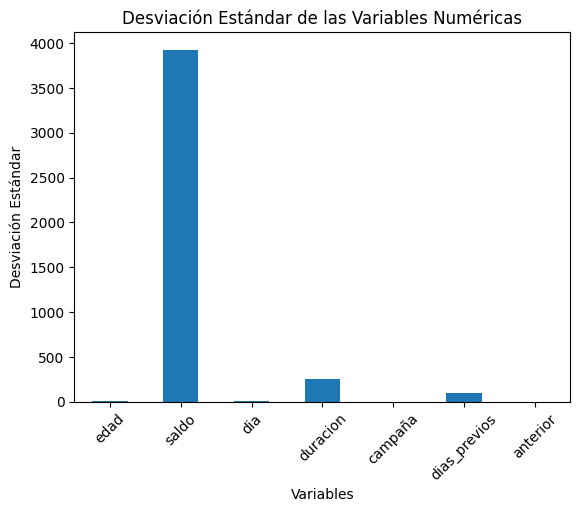

In [ ]:
# Crear una gráfica de barras para representar las desviaciones estándar
desviaciones_estandar.plot(kind='bar')
plt.title('Desviación Estándar de las Variables Numéricas')
plt.xlabel('Variables')
plt.ylabel('Desviación Estándar')
plt.xticks(rotation=45)
plt.show()

El saldo tiene una desviacion estandar muy alta en comparacion con el resto de las variables, lo que sugiere que hay una gran variabilidad en los valores, por lo que es la variable mas dispersa. La edad muestra poca variacion.

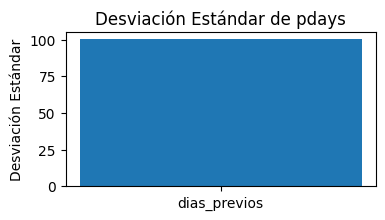

In [ ]:
# Graficar la desviación estándar de 'pdays'
plt.figure(figsize=(4, 2))  # Configura el tamaño de la figura
plt.bar('dias_previos', destd_pdays)  # Crea una barra para la desviación estándar de 'pdays'
plt.title('Desviación Estándar de pdays')
plt.ylabel('Desviación Estándar')
plt.show()

In [ ]:
# Calcula la media del atributo "pdays: dias de contacto al usuario antes de la campaña actual"
media = data['dias_previos'].mean()

print("Promedio de dias de contacto:", media)

Promedio de dias de contacto: 40.17822461123277


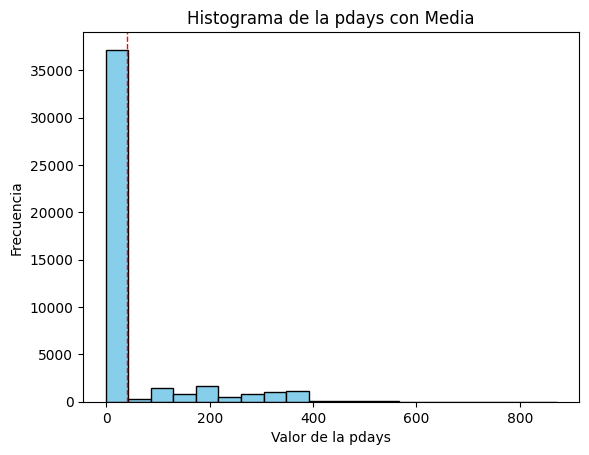

In [ ]:
# Graficar un histograma del atributo "pdays"
plt.hist(data['dias_previos'], bins=20, color='skyblue', edgecolor='black')

# Agregar una línea vertical para mostrar la media
plt.axvline(media, color='red', linestyle='dashed', linewidth=1)

# Etiquetas y título
plt.xlabel('Valor de la pdays')
plt.ylabel('Frecuencia')
plt.title('Histograma de la pdays con Media')

# Mostrar la gráfica
plt.show()

##4.3 Filas repetidas

In [ ]:
#Mostramos la cantidad de registros antes de aplicar una transformación, limpieza o filtro
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
#Mostramos la cantidad de registros después de aplicar una transformación, limpieza o filtro
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (45207, 17)
Tamaño del set después de eliminar las filas repetidas: (45203, 17)


##4.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

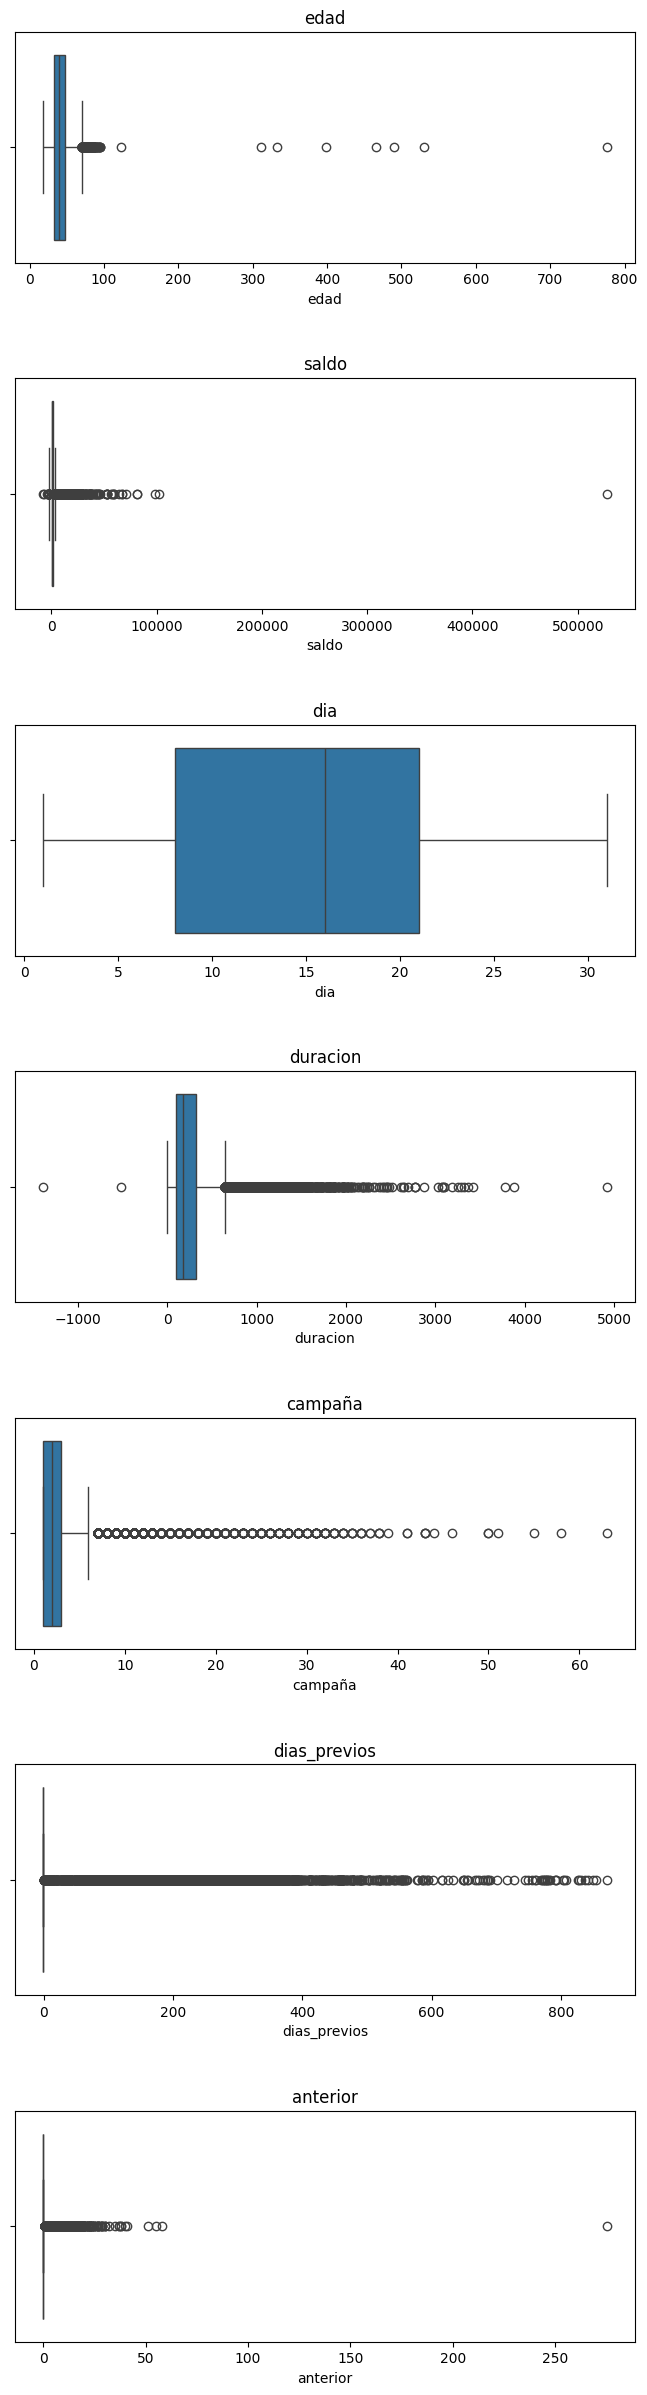

In [ ]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['edad', 'saldo', 'dia', 'duracion', 'campaña',
            'dias_previos', 'anterior']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

Varias variables muestran valores atipicos que influyen en el analisis general, por lo que es necesario que los datos sean tratados.

**Observaciones:**
- "age": hay sujetos con edades mucho mayores a 100 años
- "duration": hay valores negativos
- "previous": hay un valor extremadamente alto (cercano a 300)

In [ ]:
# Eliminar filas con "age">100
print(f'Tamaño del set antes de eliminar registros de edad: {data.shape}')
data = data.drop(data[data['edad'] > 100].index)
print(f'Tamaño del set después de eliminar registros de edad: {data.shape}')

Tamaño del set antes de eliminar registros de edad: (45203, 17)
Tamaño del set después de eliminar registros de edad: (45195, 17)


In [ ]:
# Eliminar filas con "duration"<0
print(f'Tamaño del set antes de eliminar registros de duración: {data.shape}')
data = data.drop(data[data['duracion'] < 0].index)
#data = data[data['duration']>0]
print(f'Tamaño del set después de eliminar registros de duración: {data.shape}')

Tamaño del set antes de eliminar registros de duración: (45195, 17)
Tamaño del set después de eliminar registros de duración: (45193, 17)


In [ ]:
# Eliminar filas con "previous">100
data = data.drop(data[data['anterior'] > 100].index)
print(f'Tamaño del set después de eliminar registros de "previous": {data.shape}')

Tamaño del set después de eliminar registros de "previous": (45192, 17)


##4.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

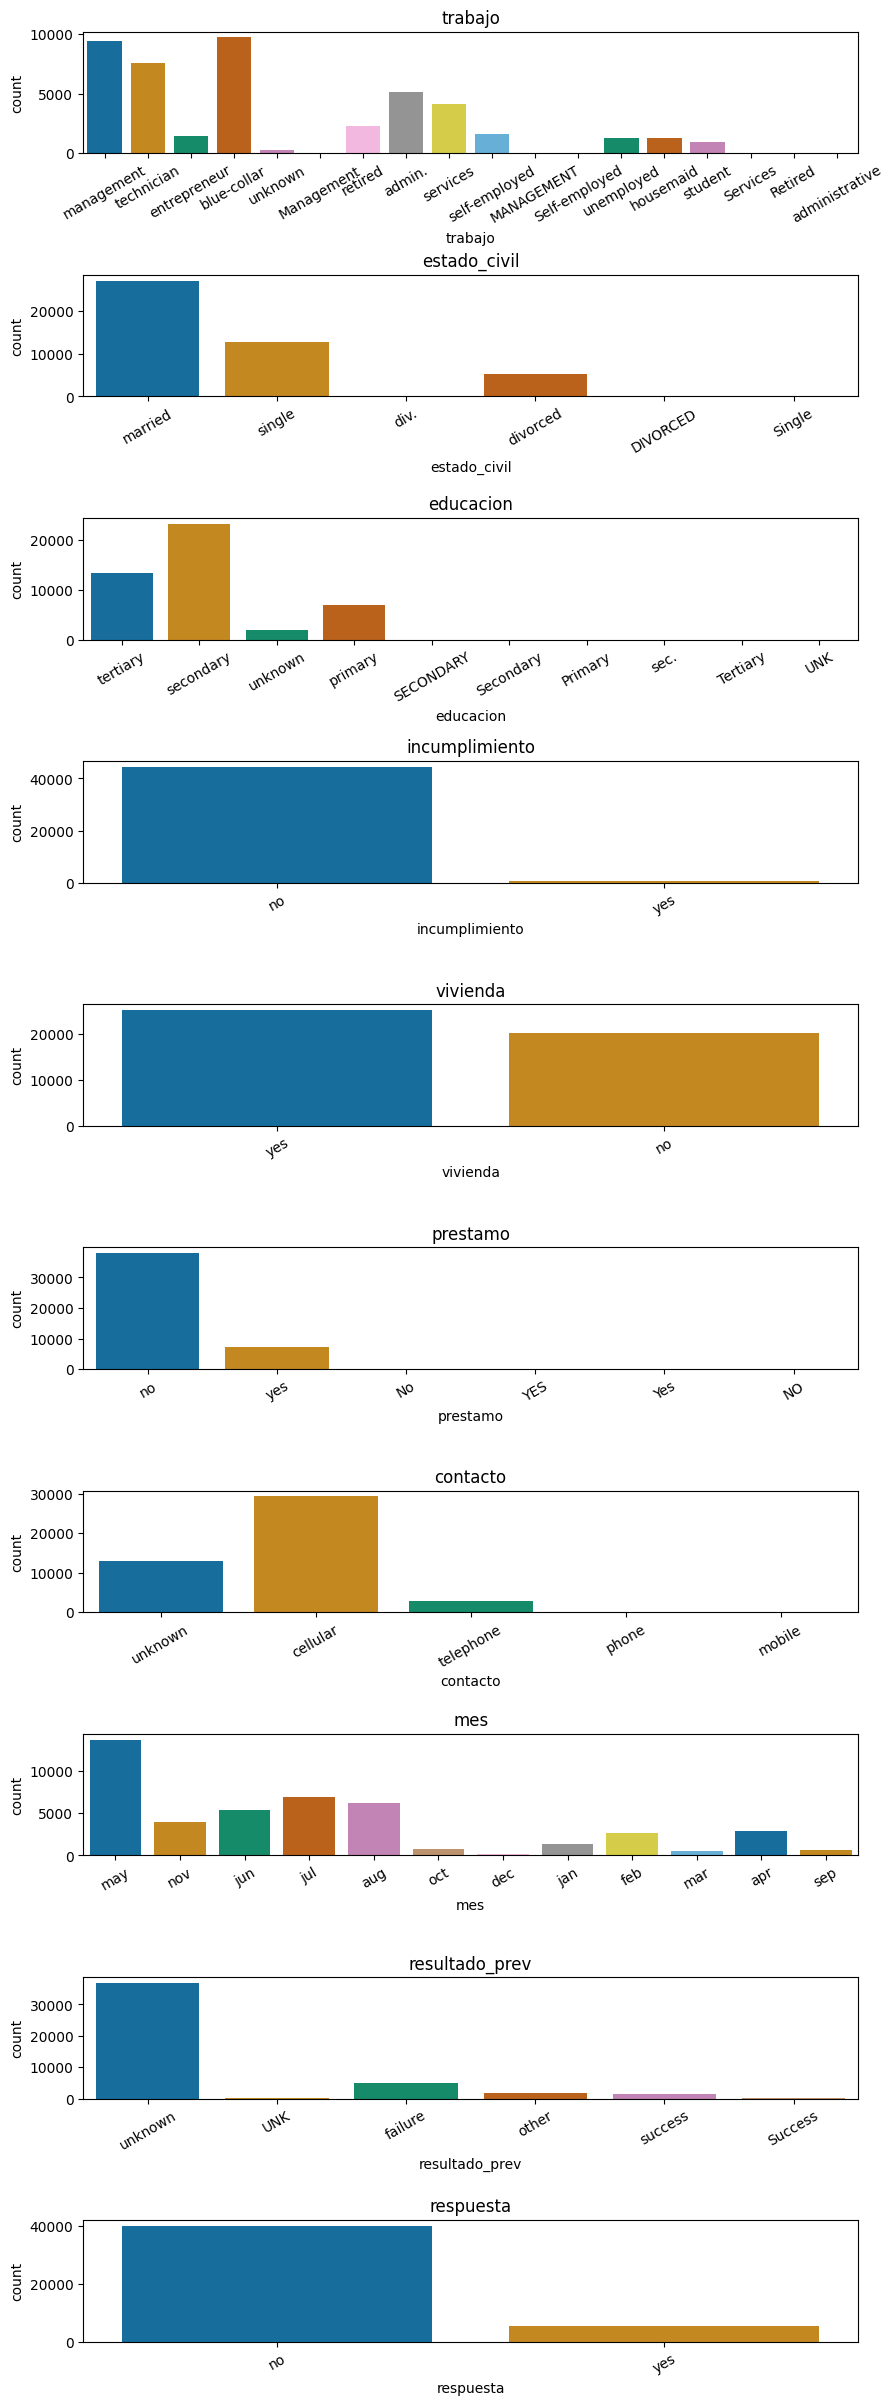

In [ ]:
# Graficar los subniveles de cada variable categórica
cols_cat = ['trabajo', 'estado_civil', 'educacion', 'incumplimiento', 'vivienda',
       'prestamo', 'contacto', 'mes', 'resultado_prev', 'respuesta']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, hue=col, data=data, ax=ax[i], palette= 'colorblind', legend=False)
  ax[i].set_title(col)
  ax[i].tick_params(axis='x', labelrotation=30)

Inicialmente se observa que hay sub-niveles con el mismo nombre pero escritos en minúscula, en mayúscula o con la primera letra en mayúscula.

Unifiquemos estos sub-niveles inicialmente:

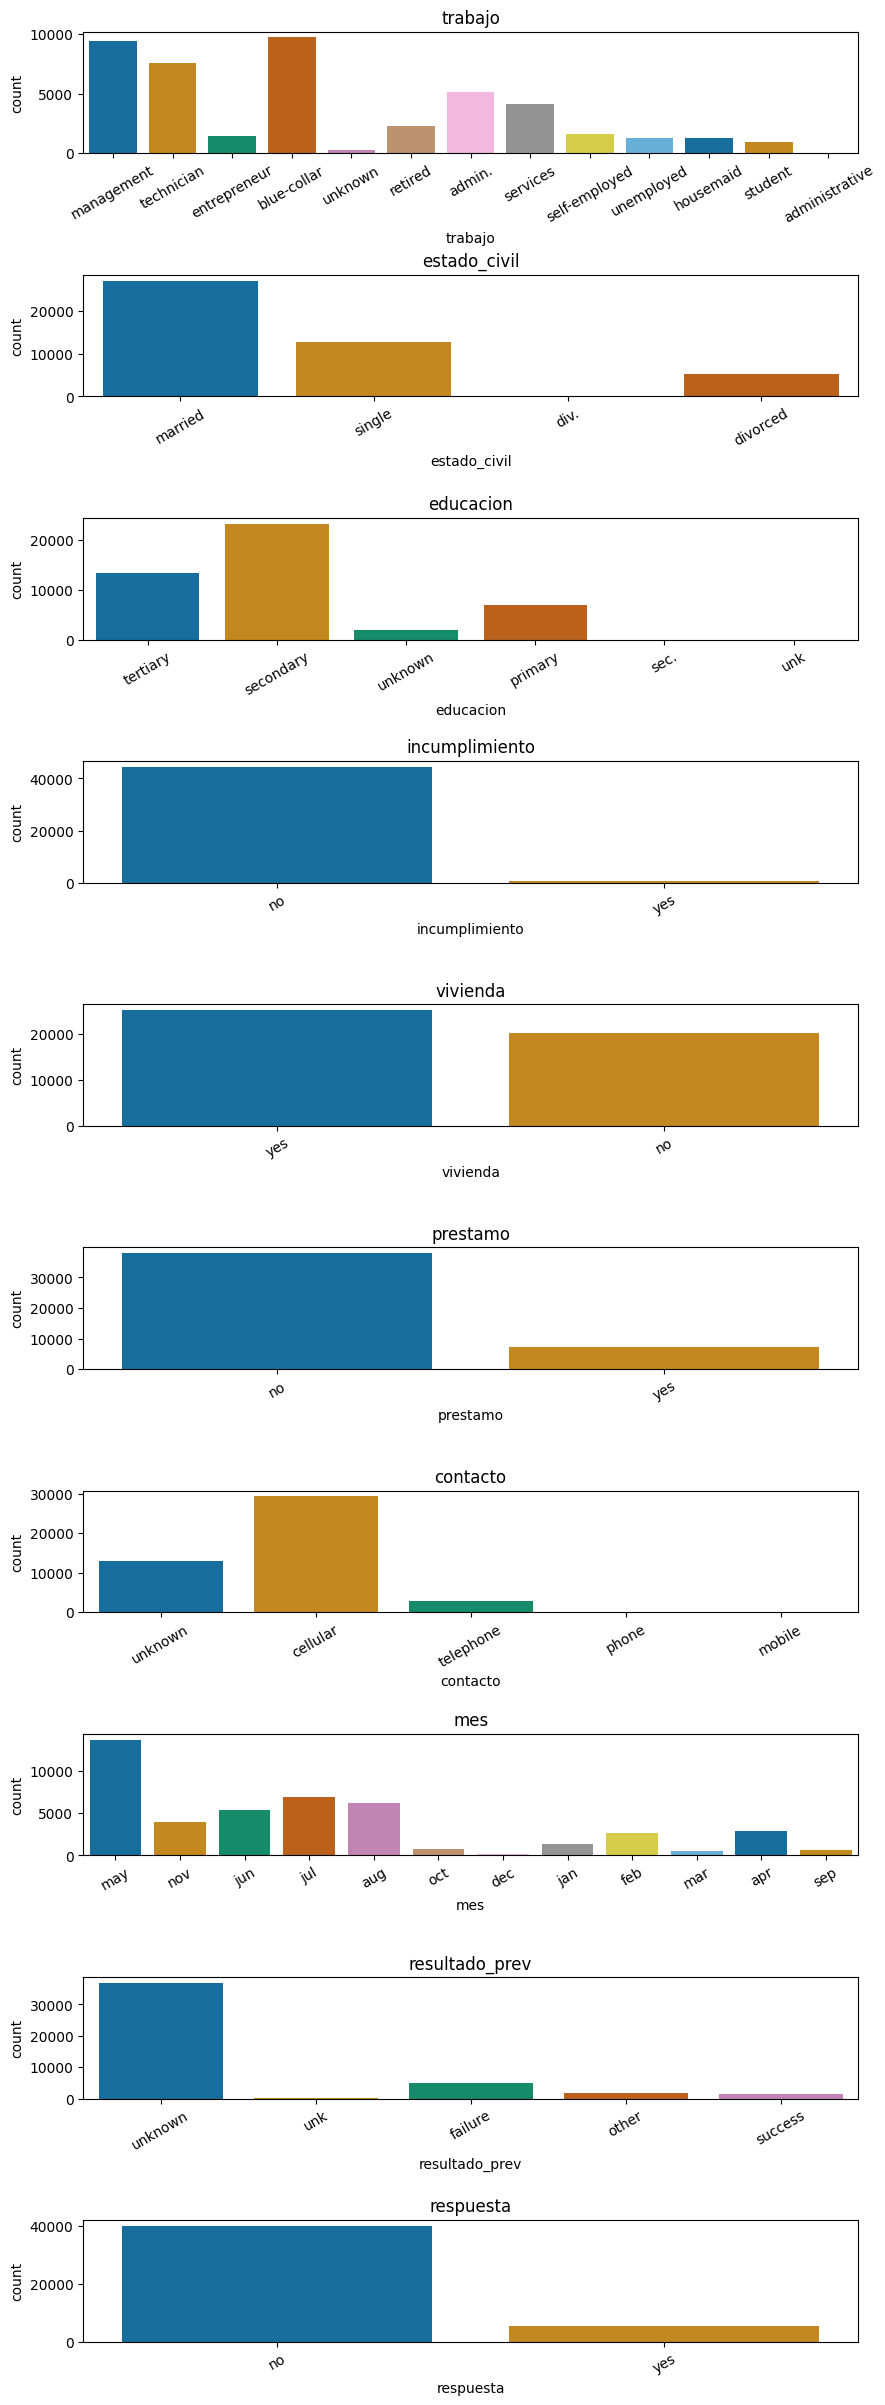

In [ ]:
for column in data.columns:
#Representar en minúsculas sólo si la columna es categórica
    if column in cols_cat:
        data[column] = data[column].str.lower()

#generemos las gráficas nuevamente
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, hue=col, data=data, ax=ax[i], palette='colorblind', legend=False)
  ax[i].set_title(col)
  ax[i].tick_params(axis='x', labelrotation=30)

Las variables como trabajo, estado civil y educacion muestran diversidad en los datos, lo que sugiere que es importante realizar analisis mas detallados para identificar patrones especificos. Este analisis puede ayudar  a identificar tendencias clave y segmentar mejor la audiencia en campañas de marketing o estudios relacionados.

In [ ]:
# job: unificar admin. y administrative
print(data['trabajo'].unique())
data['trabajo'] = data['trabajo'].str.replace('admin.','administrative', regex=False)
print(data['trabajo'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'administrative']
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


In [ ]:
# marital: unificar div. y divorced
print(data['estado_civil'].unique())
data['estado_civil'] = data['estado_civil'].str.replace('div.','divorced', regex=False)
print(data['estado_civil'].unique())

['married' 'single' 'div.' 'divorced']
['married' 'single' 'divorced']


In [ ]:
# education: unificar sec. y secondary, unk y unknown
print(data['educacion'].unique())
data['educacion'] = data['educacion'].str.replace('sec.','secondary', regex=False)
data.loc[data['educacion']=='unk','educacion'] = 'unknown'
print(data['educacion'].unique())

['tertiary' 'secondary' 'unknown' 'primary' 'sec.' 'unk']
['tertiary' 'secondary' 'unknown' 'primary']


In [ ]:
# contact: unificar telephone y phone
print(data['contacto'].unique())
data.loc[data['contacto']=='phone','contacto'] = 'telephone'
data.loc[data['contacto']=='mobile','contacto'] = 'cellular'
print(data['contacto'].unique())

['unknown' 'cellular' 'telephone' 'phone' 'mobile']
['unknown' 'cellular' 'telephone']


In [ ]:
# poutcome: unificar unk y unknown
print(data['resultado_prev'].unique())
data.loc[data['resultado_prev']=='unk','resultado_prev']='unknown'
print(data['resultado_prev'].unique())

['unknown' 'unk' 'failure' 'other' 'success']
['unknown' 'failure' 'other' 'success']


In [ ]:
#Edad(age) promedio(mean) de los clientes interesados en adquirir un certificado de depósito(y)
edad_promedio_interesados = data[data['respuesta'] == 'yes']['edad'].mean()
print("1. Edad promedio de los clientes interesados:", edad_promedio_interesados)

1. Edad promedio de los clientes interesados: 41.665468306527906


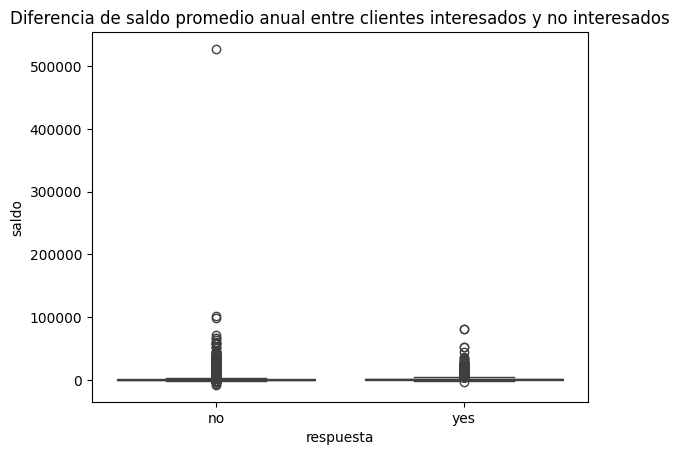

In [ ]:
#Diferencia de ingresos entre clientes interesados y no interesados:
sns.boxplot(x='respuesta', y='saldo', data=data)
plt.title('Diferencia de saldo promedio anual entre clientes interesados y no interesados')
plt.show()

A simple vista, los clientes que aceptaron (respondieron "yes") y los que no aceptaron (respondieron "no") tienen saldos promedio similares. Las distribuciones son casi idénticas en ambos grupos.
El rango intercuartil (la caja en el gráfico de caja y bigotes) es muy pequeño en ambos casos, lo que indica que la mayoría de los clientes tienen saldos similares, con una dispersión pequeña entre ellos.
En resumen, el saldo no parece ser un factor determinante para predecir el interés del cliente en la oferta, aunque los outliers podrían requerir atención especial para entender sus casos particulares.

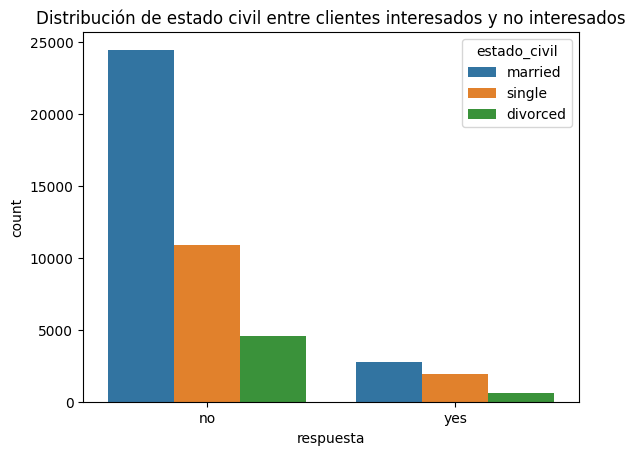

In [ ]:
#Distribución de estado civil entre clientes interesados:
sns.countplot(x='respuesta', hue='estado_civil', data=data)
plt.title('Distribución de estado civil entre clientes interesados y no interesados')
plt.show()

La mayoría de los clientes, tanto interesados como no interesados, están casados. Sin embargo, el grupo de clientes que no están interesados tiene una mayor proporción de personas casadas, casi el doble en comparación con las otras categorías. Se podrían diseñar estrategias de marketing más segmentadas para los diferentes estados civiles. Dado que los solteros y divorciados muestran menor interés, quizá se puedan implementar enfoques más personalizados o incentivos que apelen a estos grupos. En resumen, hay una mayor proporción de personas casadas que no están interesadas en la oferta, y es necesario explorar estrategias diferenciadas para aumentar el interés en los distintos grupos de estado civil.

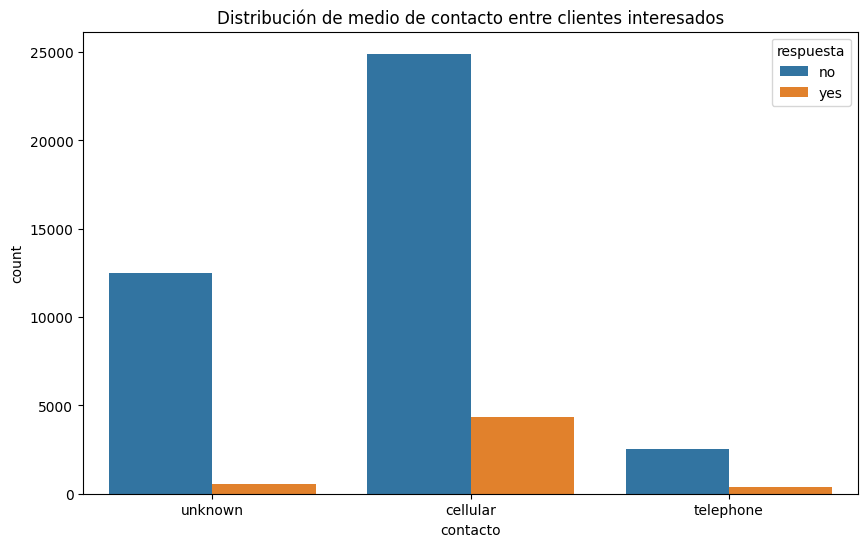

In [ ]:
#Distribución medio de contacto de los clientes interesados:
plt.figure(figsize=(10, 6))
sns.countplot(x='contacto', hue='respuesta', data=data)
plt.title('Distribución de medio de contacto entre clientes interesados')
plt.show()

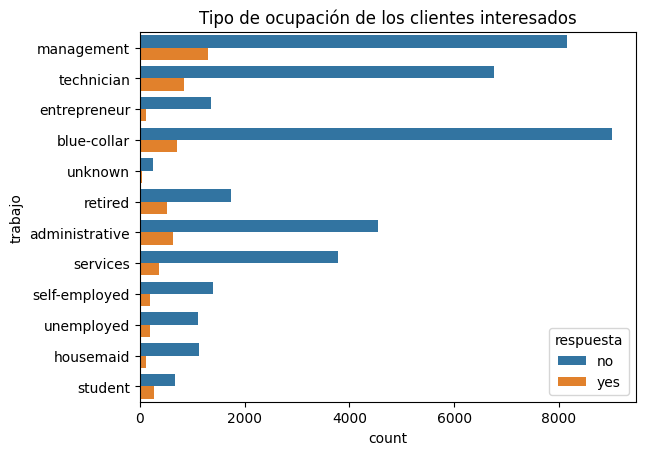

In [ ]:
#Tipo de ocupación de los clientes interesados:
sns.countplot(y='trabajo', hue='respuesta', data=data)
plt.title('Tipo de ocupación de los clientes interesados')
plt.show()

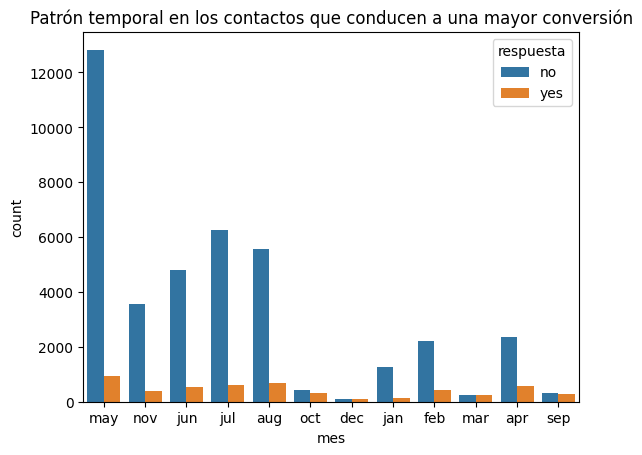

In [ ]:
#Patrón temporal en los contactos que conducen a una mayor conversión de clientes:
sns.countplot(x='mes', hue='respuesta', data=data)
plt.title('Patrón temporal en los contactos que conducen a una mayor conversión')
plt.show()

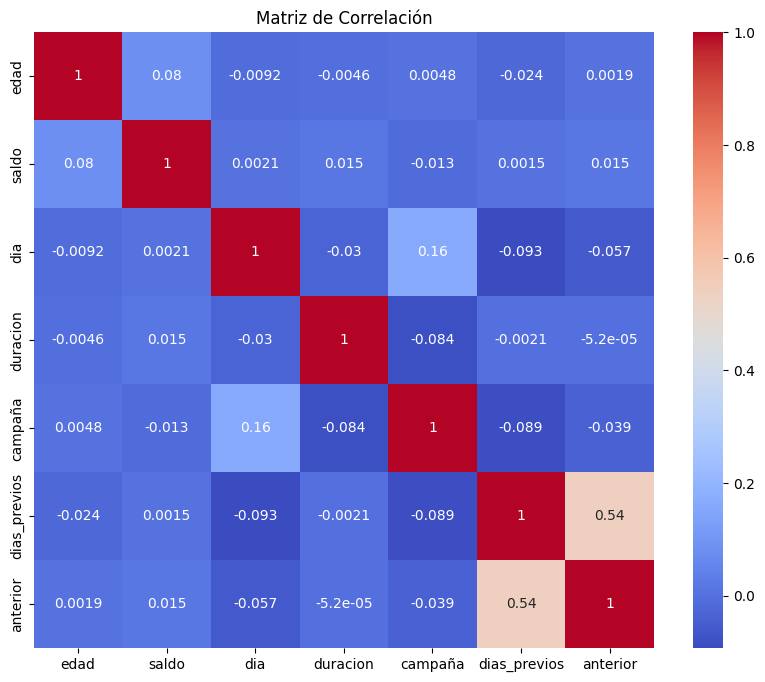

In [ ]:
# # Calcular la matriz de correlación solo para columnas numéricas
# Select only numerical features for correlation analysis
numerical_data = data.select_dtypes(include=['number'])

correlation_matrix = numerical_data.corr()
# Crear un mapa de calor de la correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()



## Uso de libreria pygwalker

https://docs.kanaries.net/es/pygwalker

https://nicolasurrego.medium.com/visualizaci%C3%B3n-avanzada-de-datos-descubre-el-poder-de-pygwalker-en-python-9d708724ddfb



In [ ]:
#Instalación de librería
!pip install pygwalker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 956.2/956.2 kB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 74.4 MB/s eta 0:00:00


In [ ]:
#Importo la librería con el alias
import pygwalker as pyg

In [ ]:
#Lectura de dataset con librería
pyg.walk(data)

Box(children=(HTML(value='\n<div id="ifr-pyg-0006255735a0a3efnFDymS31qHkERPQG" style="height: auto">\n    <hea…

Libreria SWEETVIZ

In [3]:
pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 52.9 MB/s eta 0:00:00


In [5]:
import sweetviz as sv

In [6]:
# Analisis del dataset

advert_report = sv.analyze(data)

#Report
advert_report.show_html('sweetviz_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



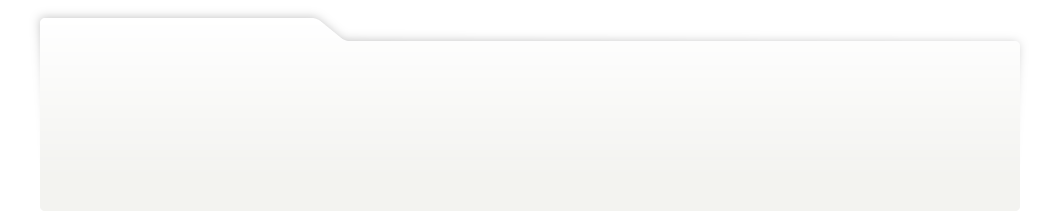
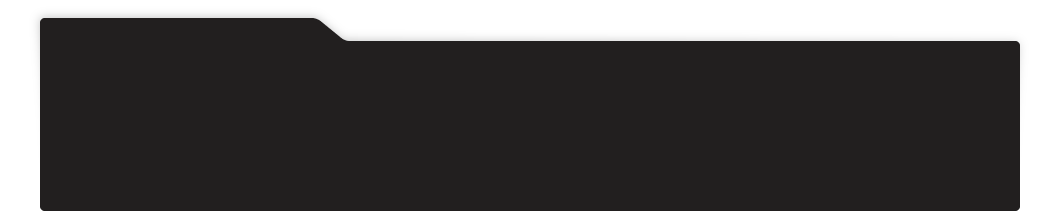
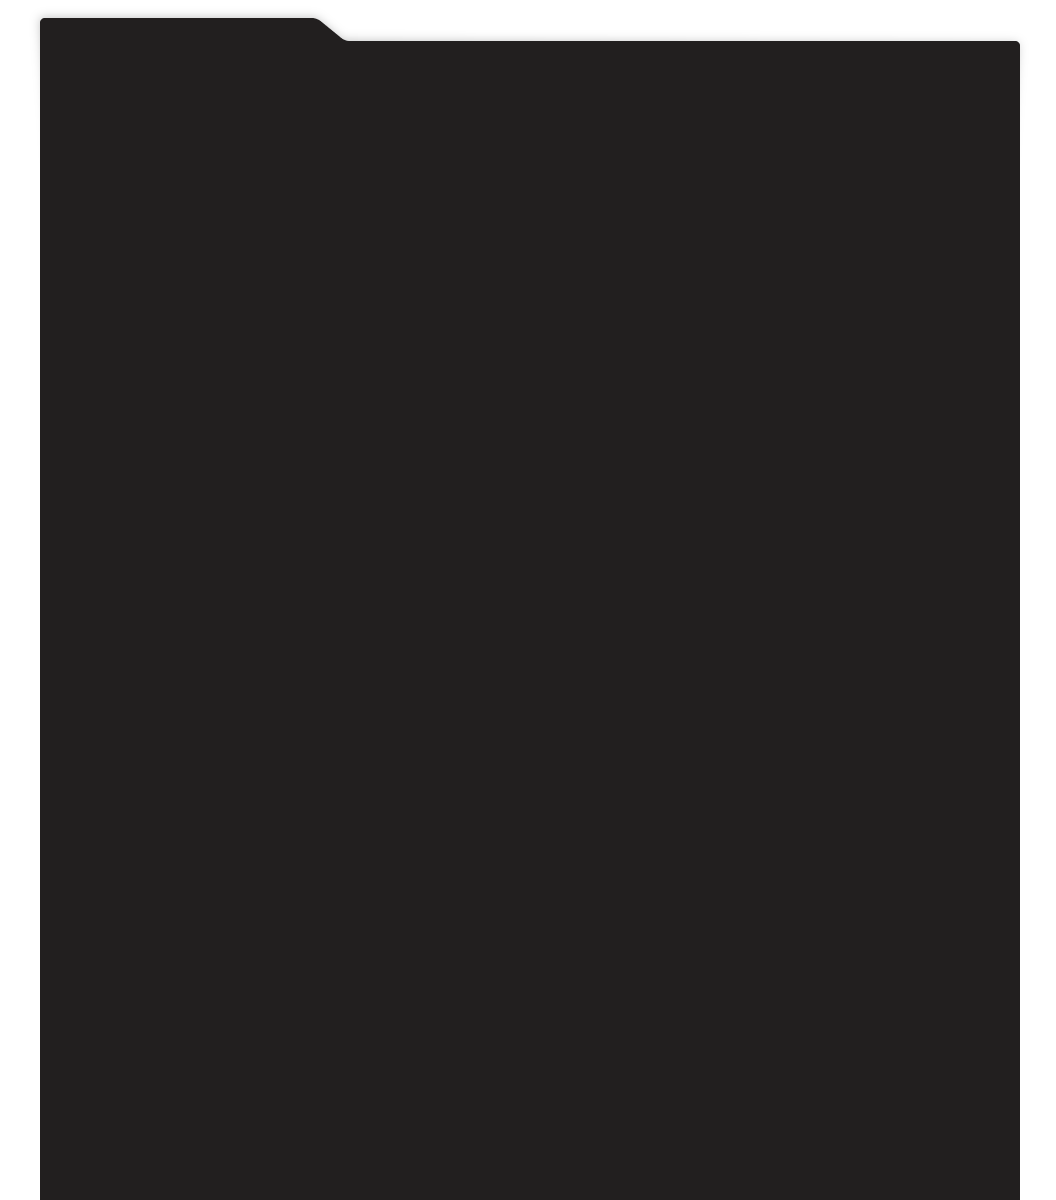
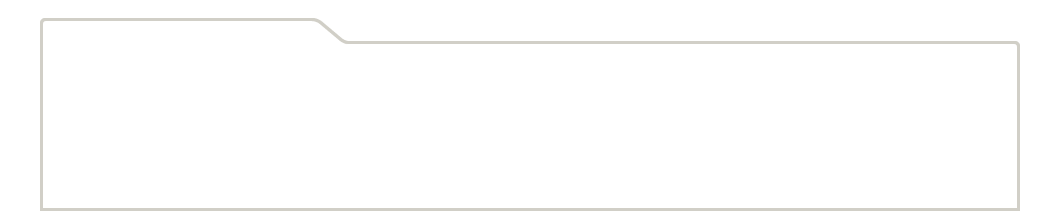
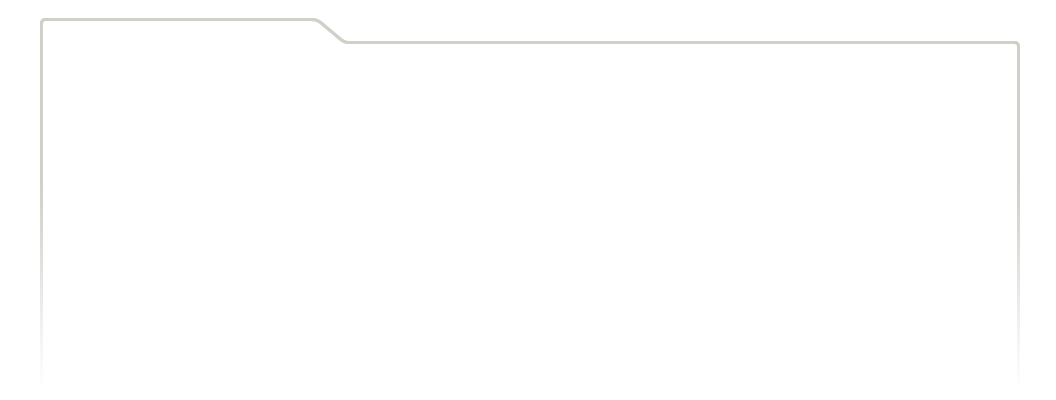
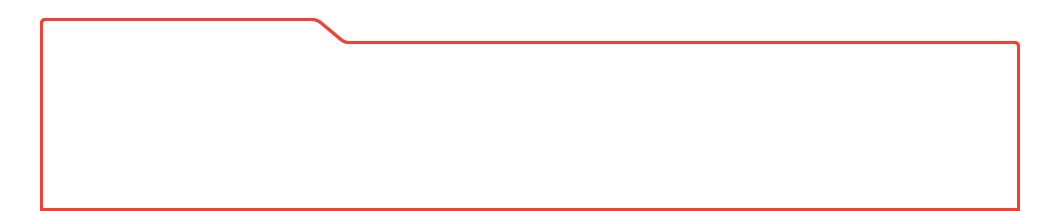
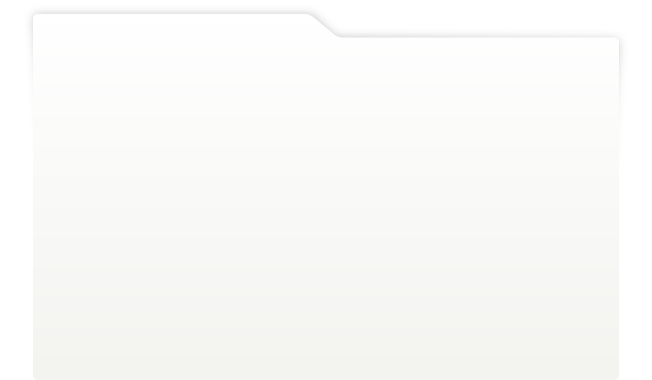
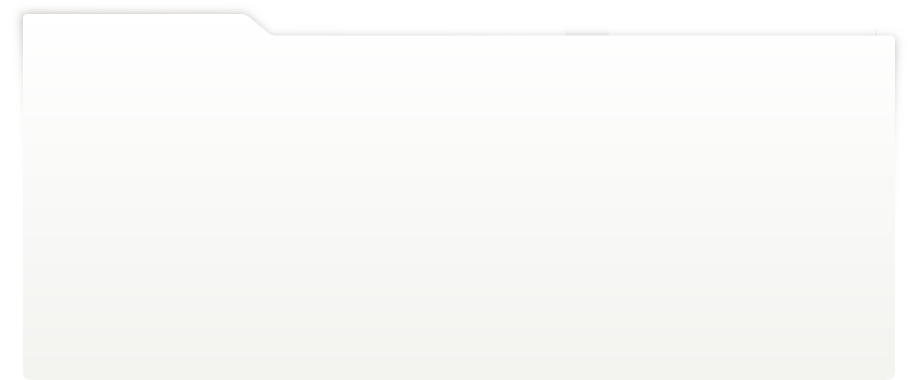
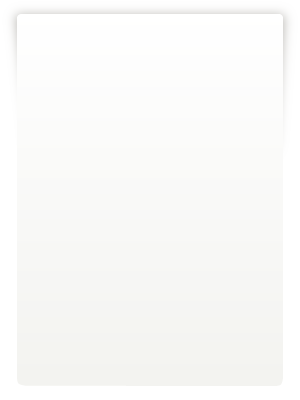
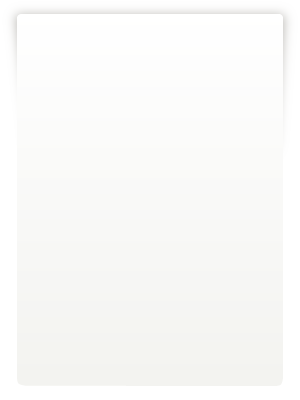
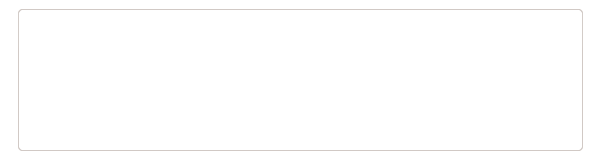
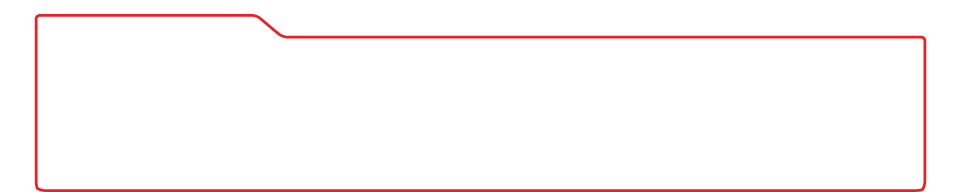
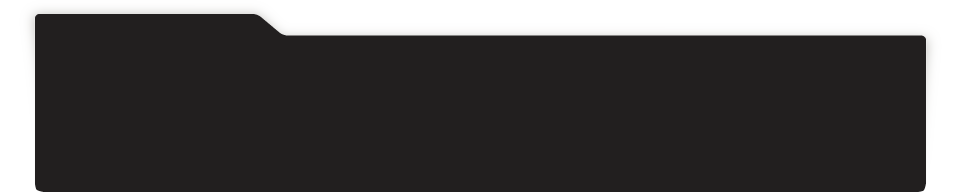
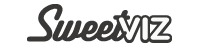
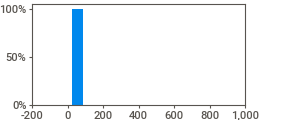
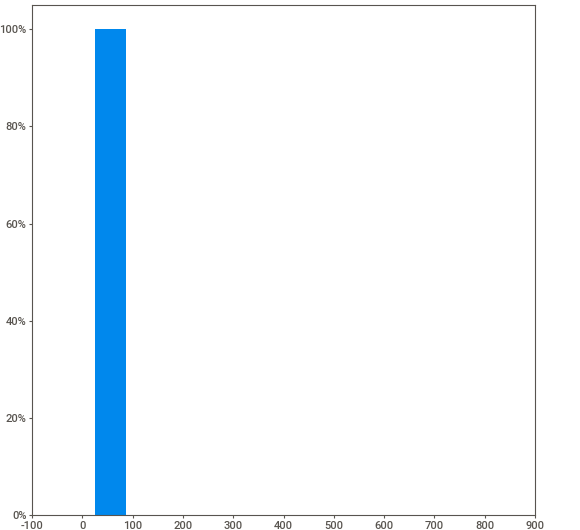
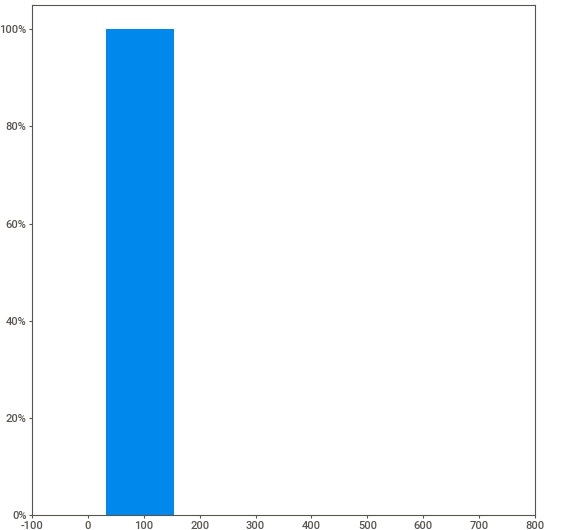
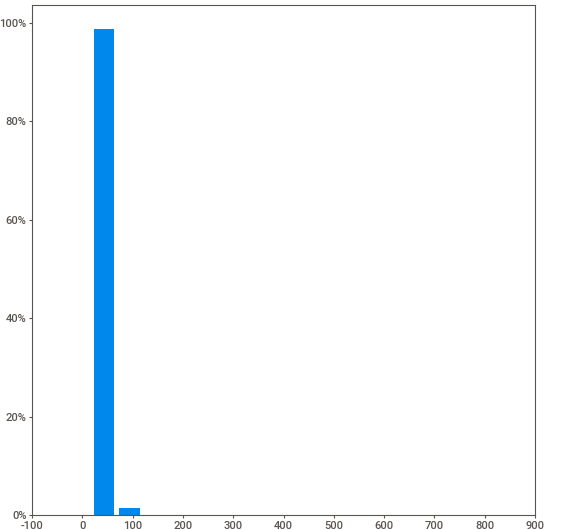
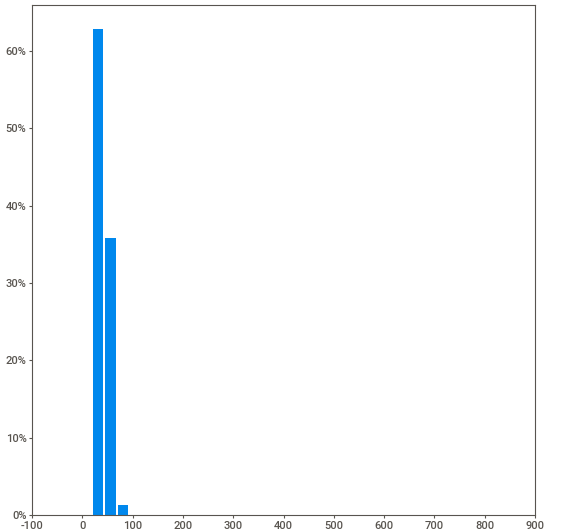
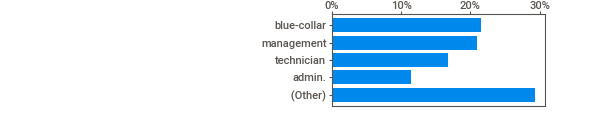
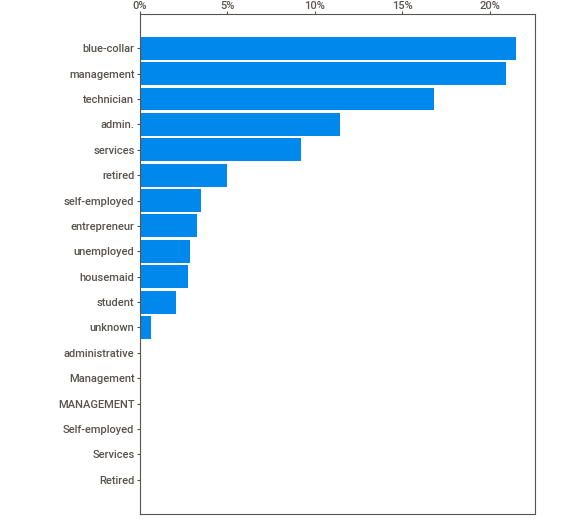
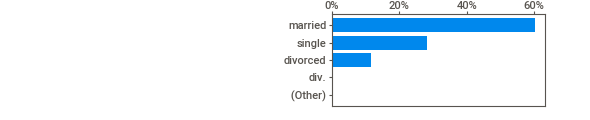
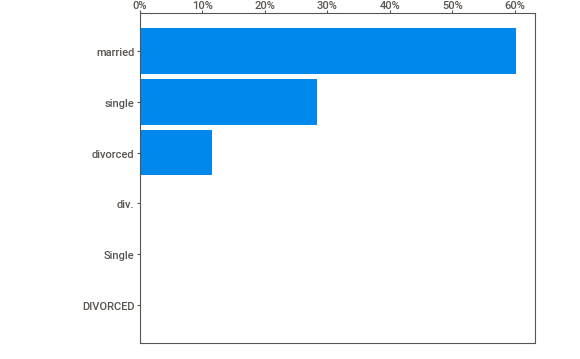
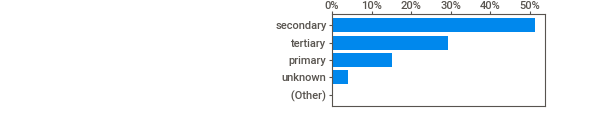
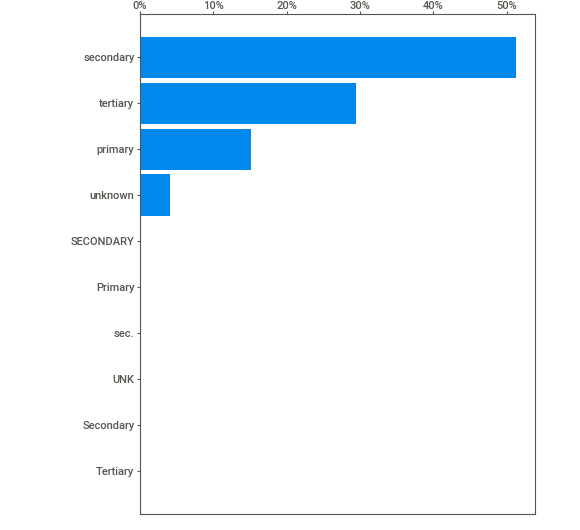
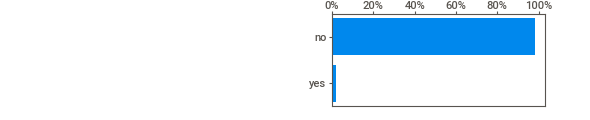
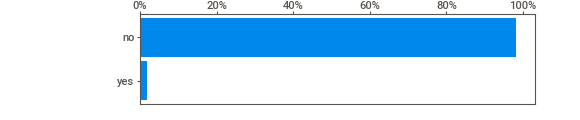
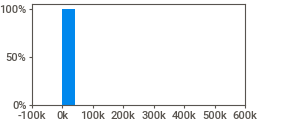
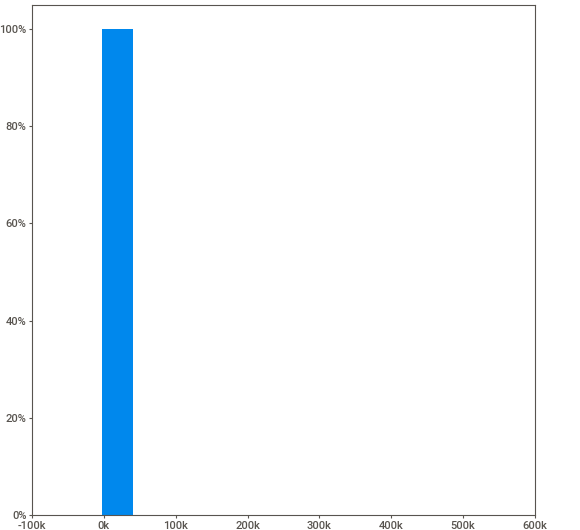
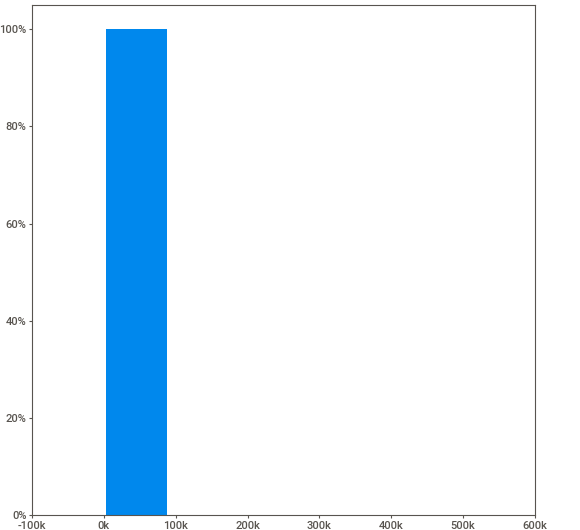
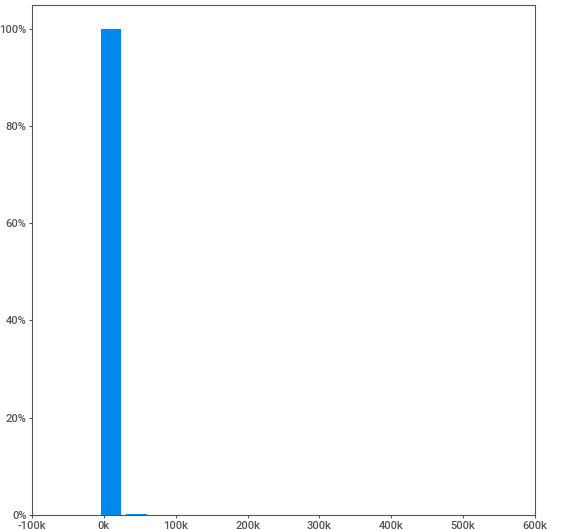
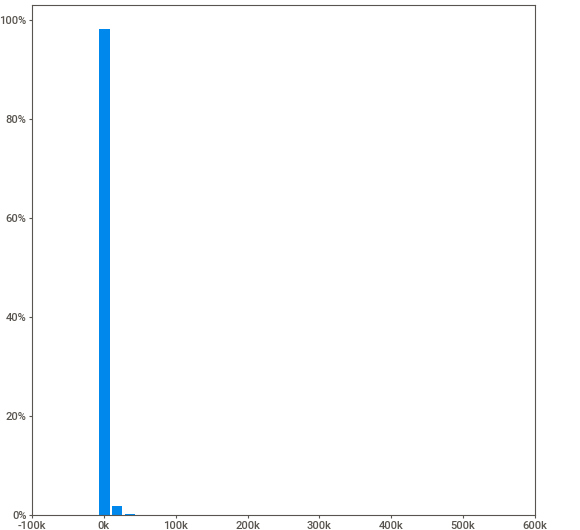
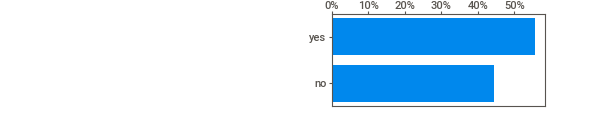
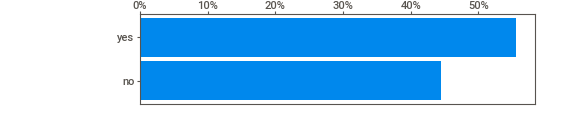
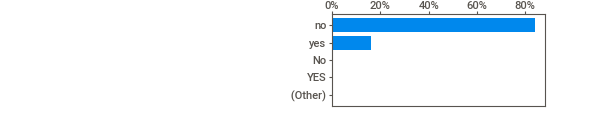
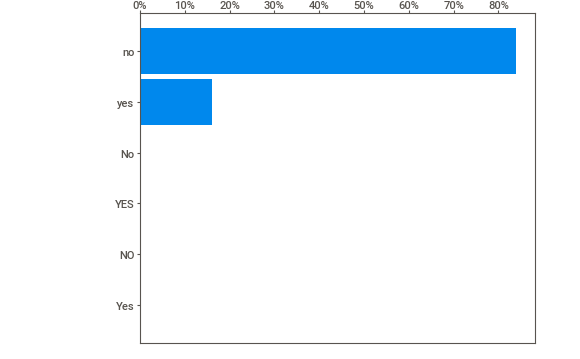
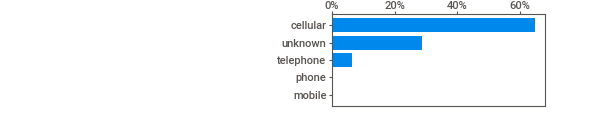
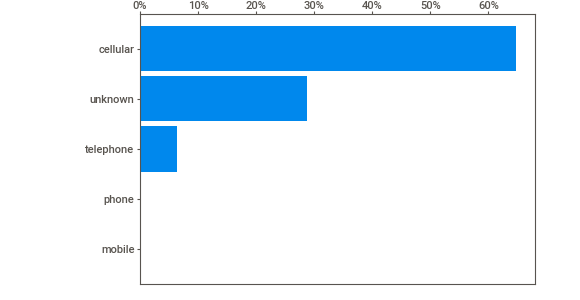
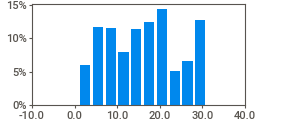
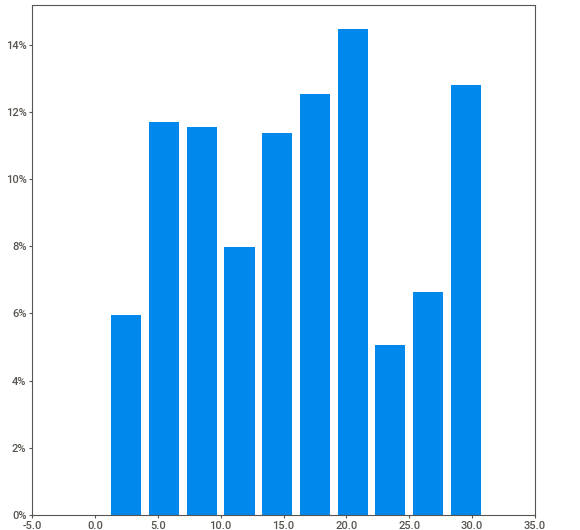
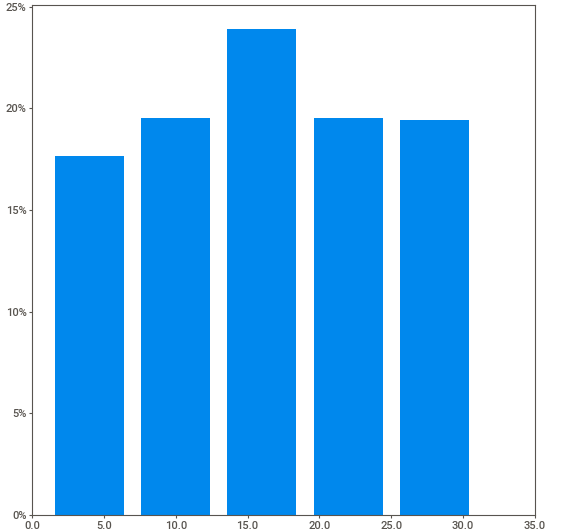
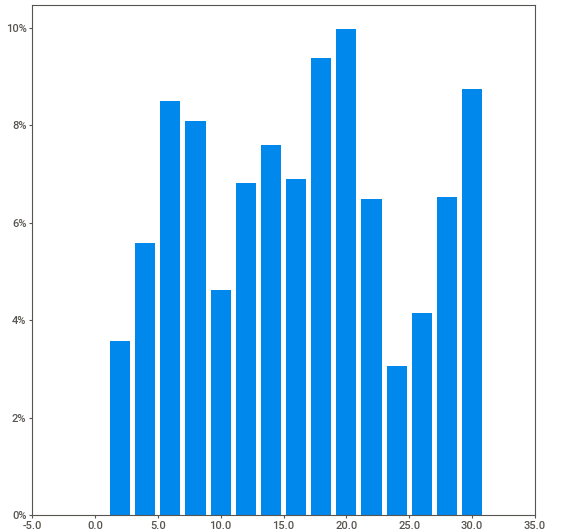
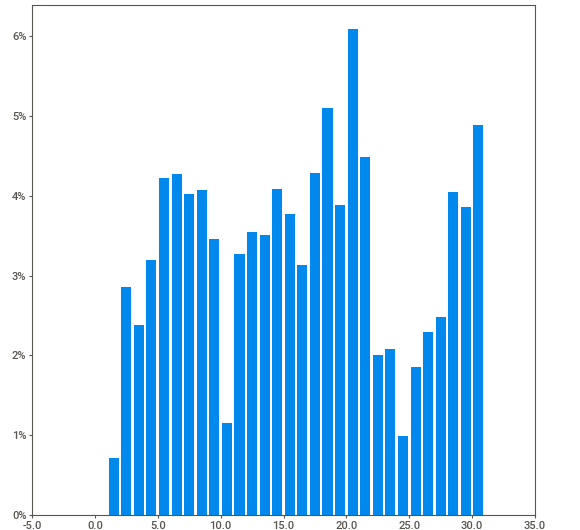
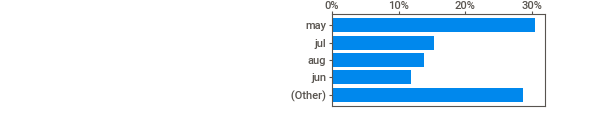
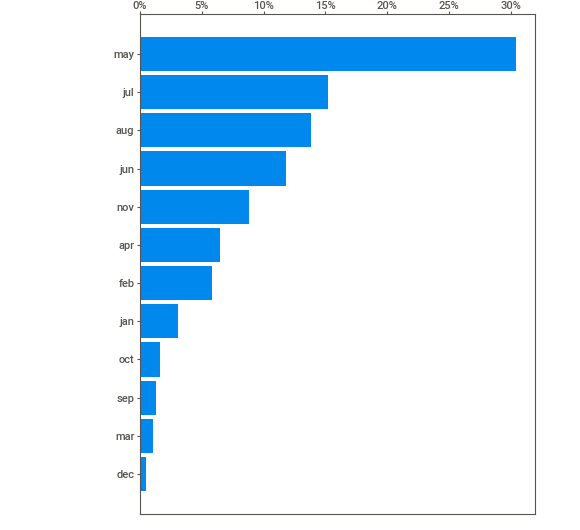
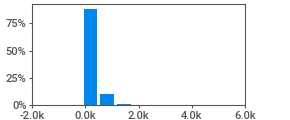
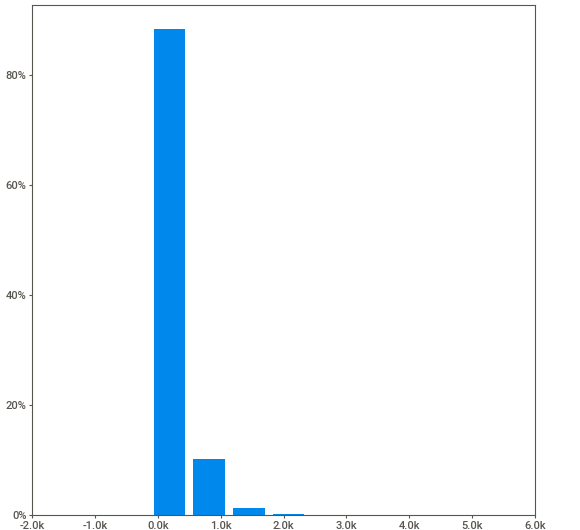
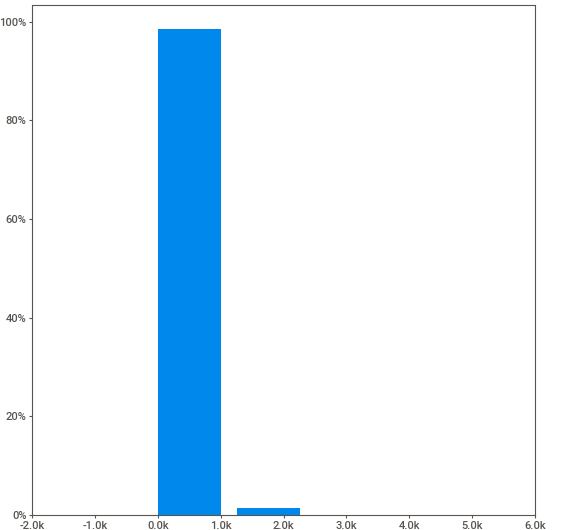
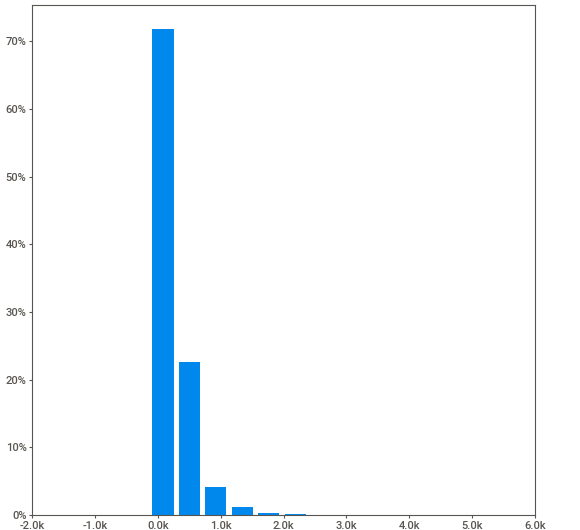
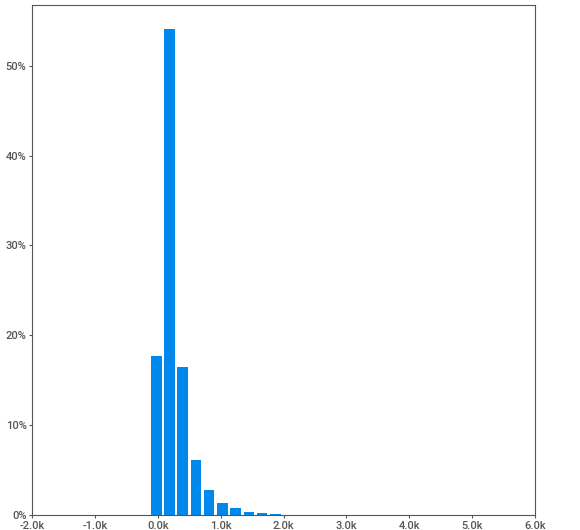
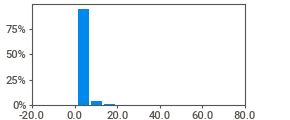
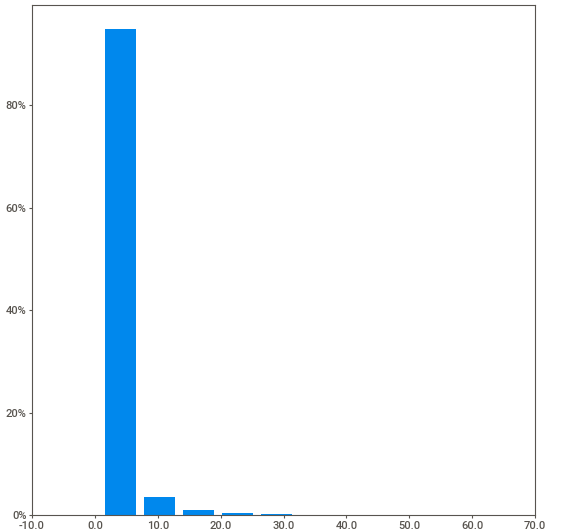
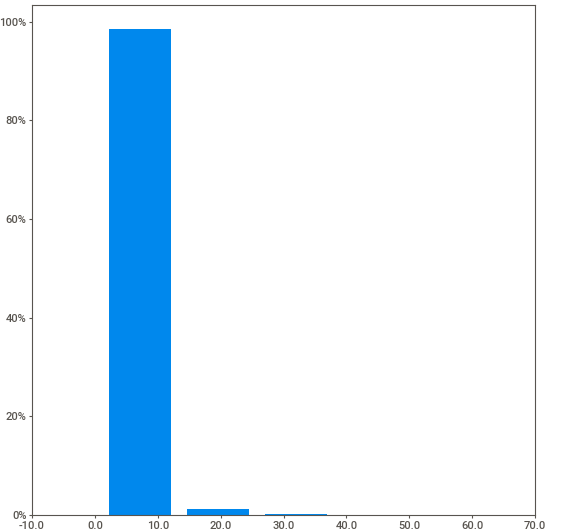
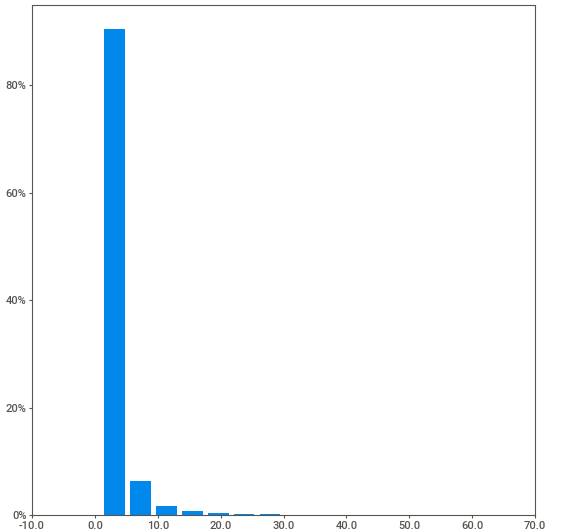
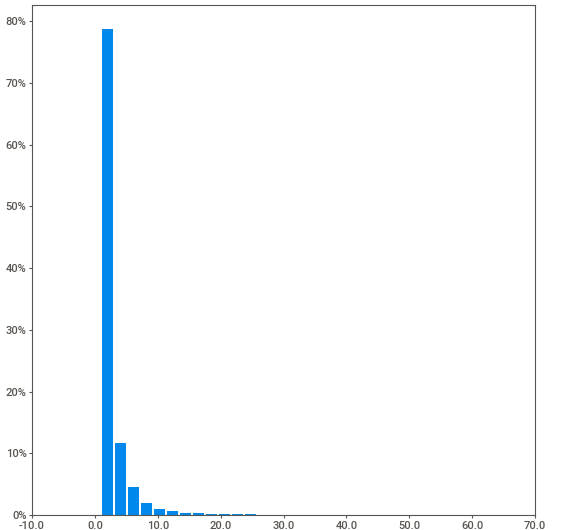
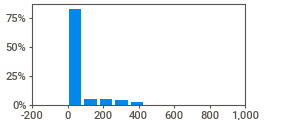
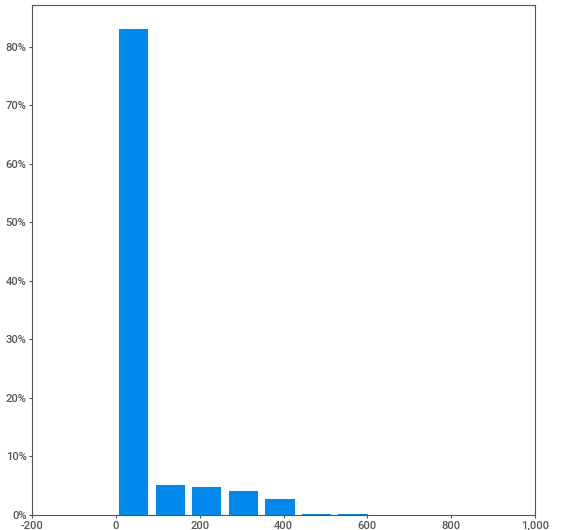
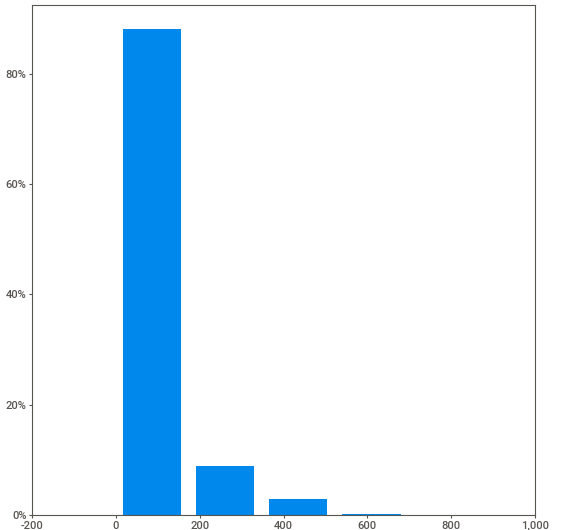
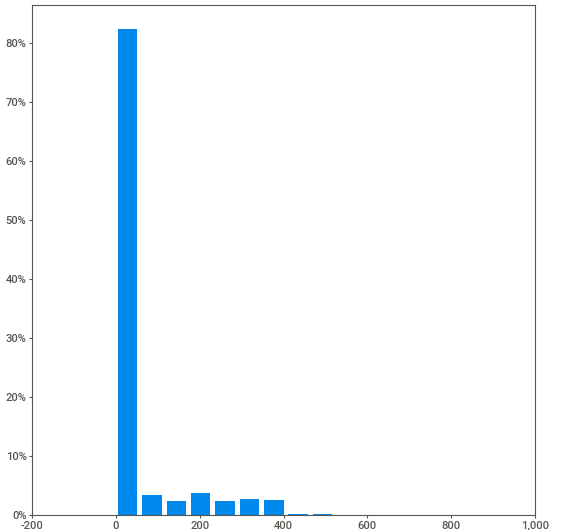
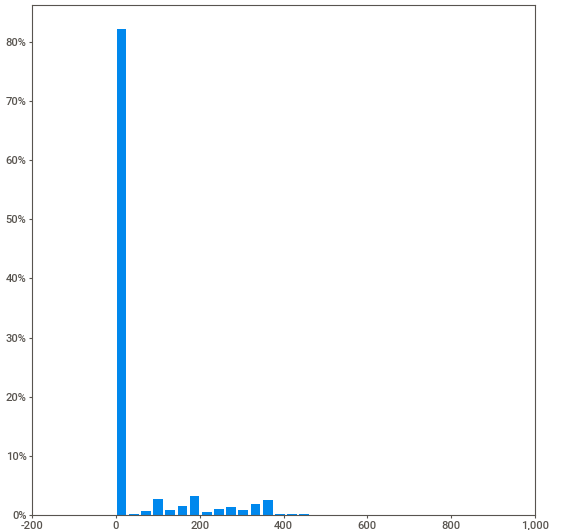
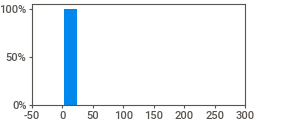
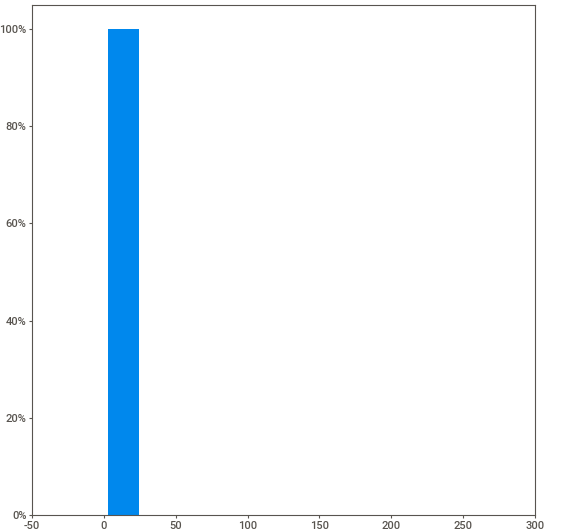
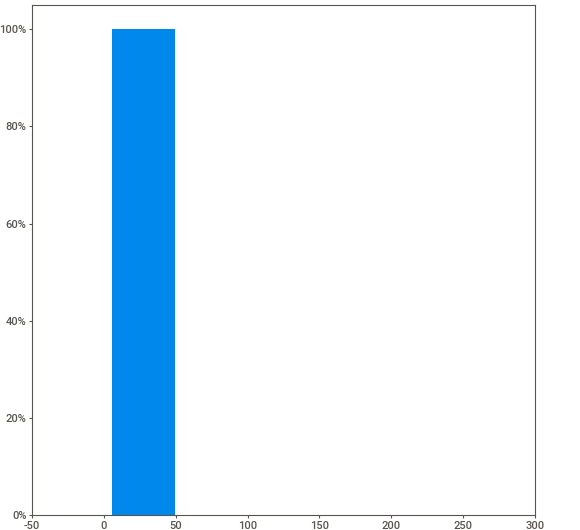
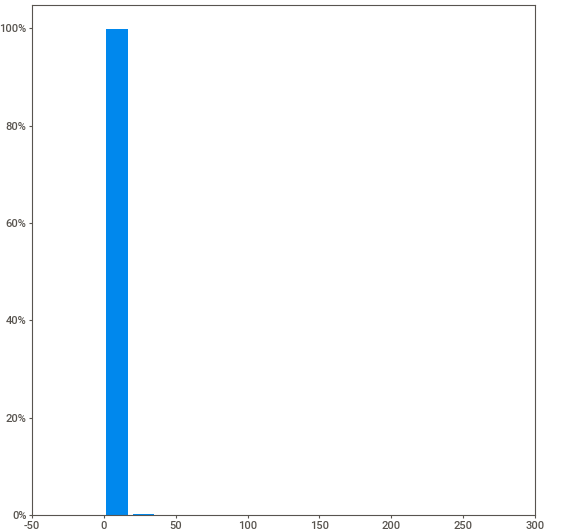
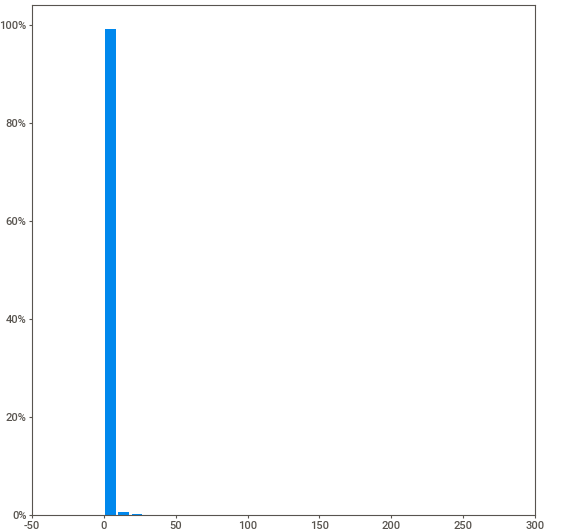
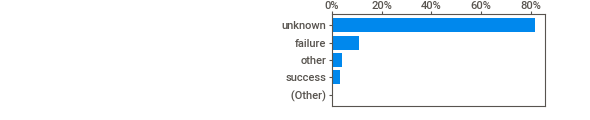
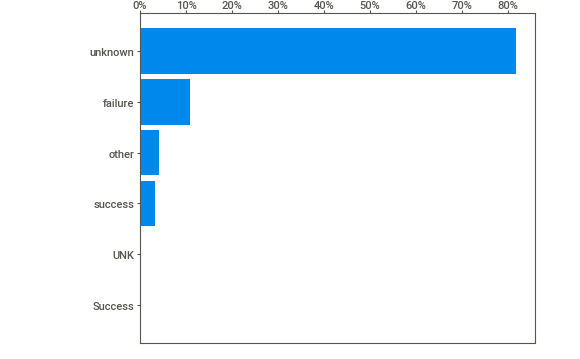
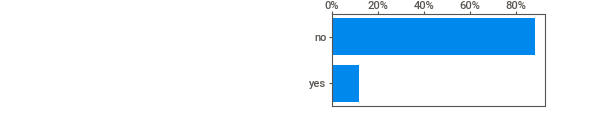
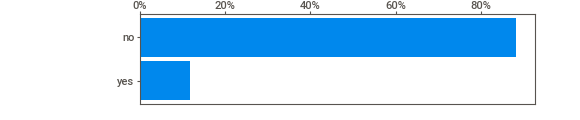
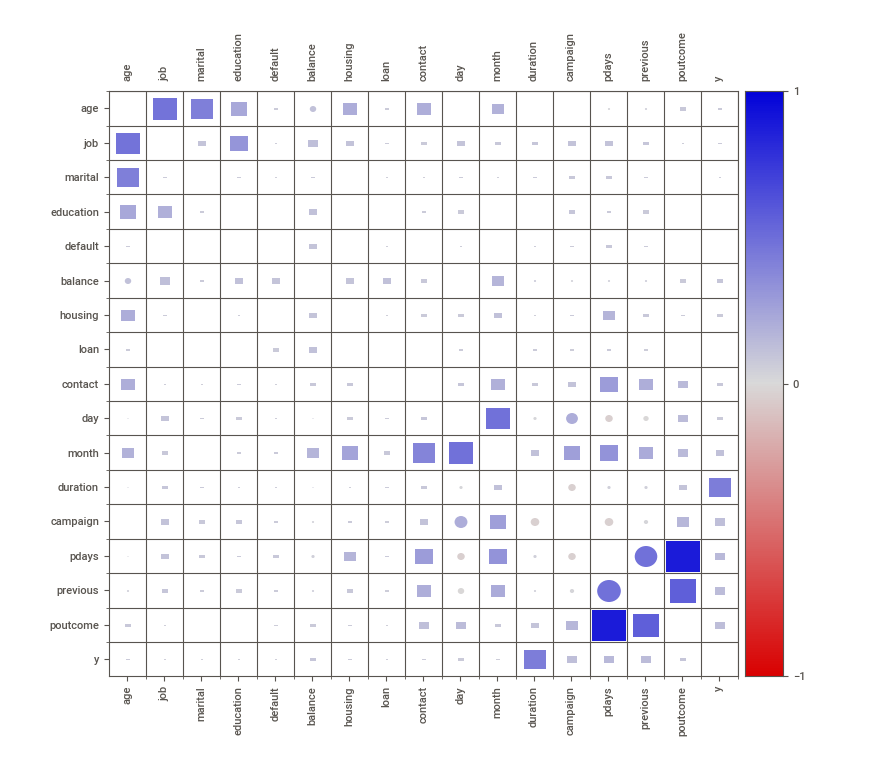
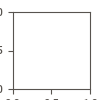

In [7]:
advert_report.show_notebook()